In [2]:
##load modules /libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import StandardScaler

In [3]:
#load dataset 
train_data_path = r"C:\Users\swapn\OneDrive\Desktop\skillcraft\house prediction\train.csv" 
test_data_path = r"C:\Users\swapn\OneDrive\Desktop\skillcraft\house prediction\test.csv"

df_train = pd.read_csv (train_data_path)
df_test = pd.read_csv (test_data_path)

print("shape of df_train : " , df_train.shape)
print("shape of df_test: ", df_test.shape)

shape of df_train :  (1460, 81)
shape of df_test:  (1459, 80)


In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
#data integration 

In [8]:
df = pd.concat([df_train, df_test])
print("shape of integrated data : ", df.shape)

shape of integrated data :  (2919, 81)


In [9]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [10]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [12]:
#most null value feature
#alley
#fireplacequ
#poolqc
#fence
#miscfeature


In [13]:
int_features = df.select_dtypes(include = ["int64"]).columns
print("total no of integer features : " , int_features.shape[0])

print("integer feature names : ", int_features.tolist())

total no of integer features :  26
integer feature names :  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [14]:
float_features = df.select_dtypes(include = ["float64"]).columns
print("total no of floating features : " , float_features.shape[0])

print("floating feature names : ", int_features.tolist())

total no of floating features :  12
floating feature names :  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [15]:
cat_features = df.select_dtypes(include = ["object"]).columns
print("total no of categorical features : " , cat_features.shape[0])

print("categorical feature names : ", cat_features.tolist())

total no of categorical features :  43
categorical feature names :  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [16]:
#get the statistical information of numerical features 

In [17]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [18]:
df.describe().shape

(8, 38)

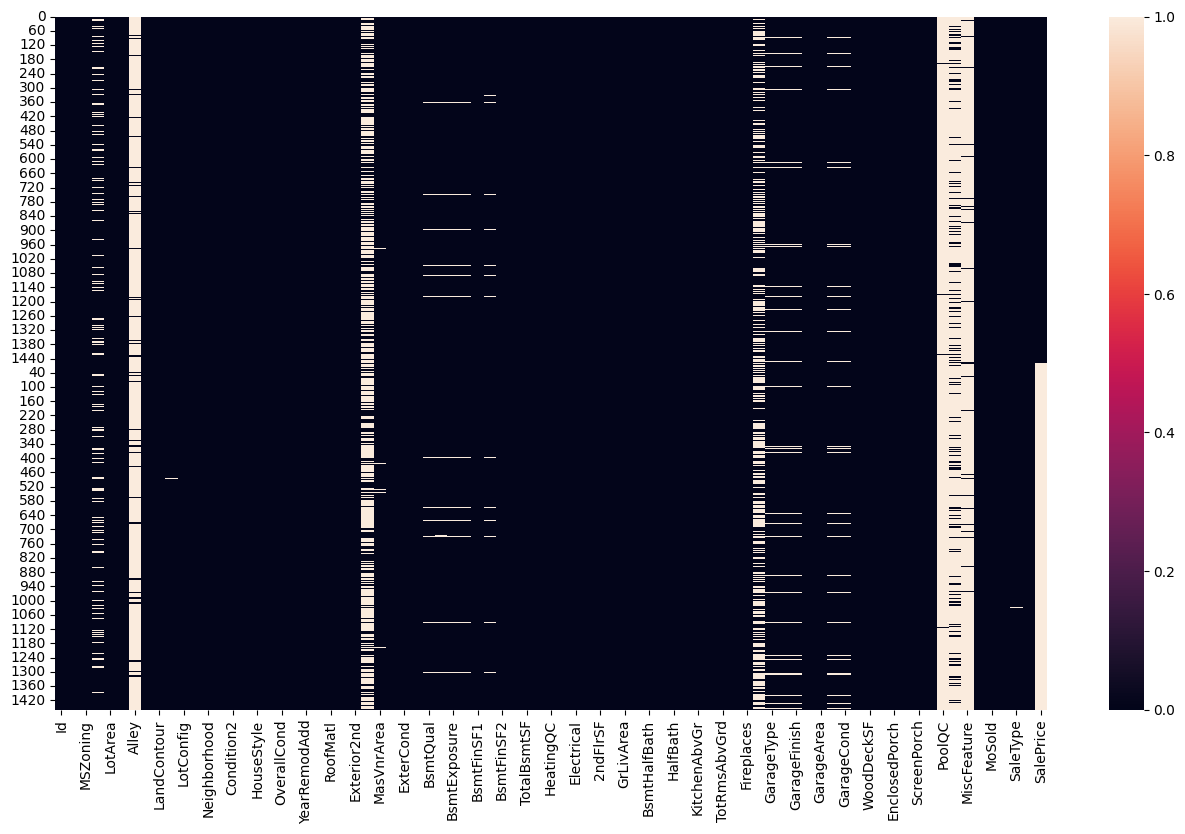

In [19]:
#finding missing values 
plt.figure(figsize = (16,9))
sns.heatmap(df.isnull())
plt.savefig(" ")


In [20]:
#set index as id column 
df = df.set_index('Id')

In [21]:
null_count = df.isnull().sum()
null_count 

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [22]:
#get the null value percentage for every feature 
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent 

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

In [23]:
#drop columns
miss_value_50_perc = null_percent[null_percent > 50]
miss_value_50_perc 

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [24]:
miss_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent <21)]
miss_value_5_20_perc 

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

<Axes: ylabel='Id'>

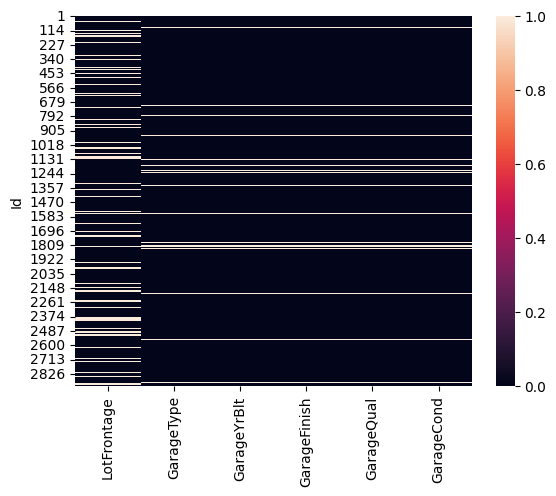

In [25]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

In [26]:
missing_value_feat = null_percent[null_percent > 0]
print("total missing values features = " , len(missing_value_feat))

total missing values features =  35


In [27]:
missing_value_feat

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [28]:
cat_na_feat = missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("total no of categorical missing features = " ,len(cat_na_feat))
cat_na_feat

total no of categorical missing features =  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [29]:
int_na_feat = missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("total no of integer missing features = " ,len(int_na_feat))
int_na_feat

total no of integer missing features =  0


Series([], dtype: float64)

In [30]:
float_na_feat = missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("total no of float  missing features = " ,len(float_na_feat))
float_na_feat

total no of float  missing features =  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

In [31]:
#handling MSZoning = 0.137033

In [32]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

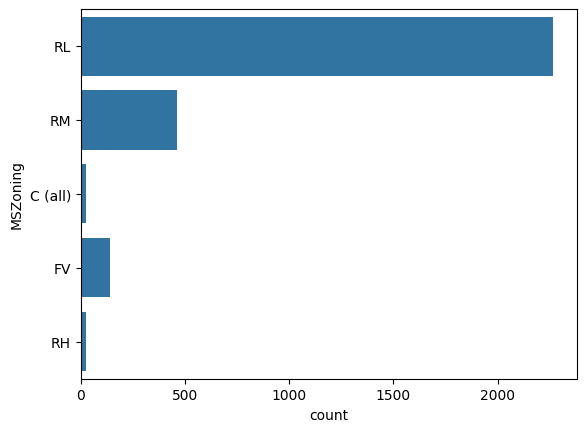

In [33]:
sns.countplot(df["MSZoning"])

In [34]:
### backup of original data 
df_mvi = df.copy()
df_mvi.shape

(2919, 80)

In [35]:
mszoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan , mszoning_mode, inplace= True)
df_mvi["MSZoning"].isnull().sum()

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\3884107883.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MSZoning"].replace(np.nan , mszoning_mode, inplace= True)


0

In [36]:
def oldnewcountplot(df, df_new, feature):
    plt.subplot(121)
    sns.countplot(df[feature])
    plt.title('old data distribution')
    plt.subplot(122)
    sns.countplot(df_new[feature])
    plt.title('New data distribution')

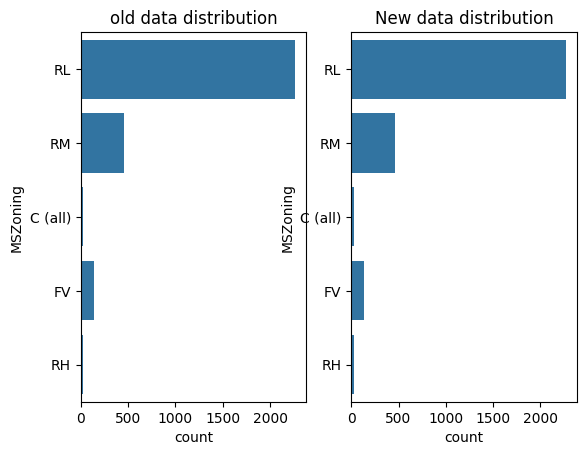

In [37]:
oldnewcountplot(df, df_mvi, "MSZoning")

In [38]:
## handling alley = 93.216855

In [39]:
df_mvi["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [40]:
alley_cont = "NA"
df_mvi["Alley"].replace(np.nan , alley_cont , inplace = True)
df_mvi['Alley'].isnull().sum()

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\3645688684.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Alley"].replace(np.nan , alley_cont , inplace = True)


0

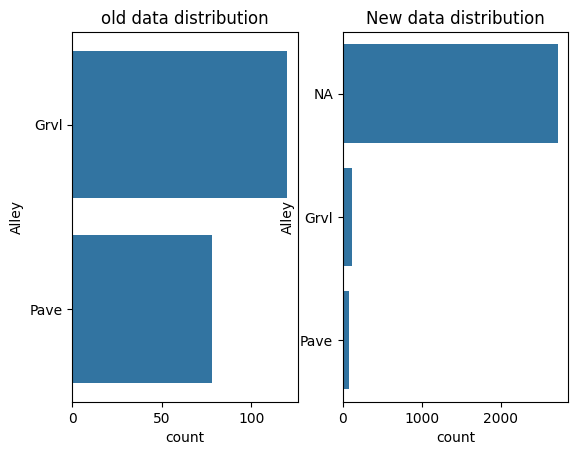

In [41]:
oldnewcountplot(df, df_mvi, "Alley")

In [42]:
## handling lotfrontage = 16.649538

In [43]:
def boxHistPlot(df, figsize= (16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot
    sns.histplot(df)

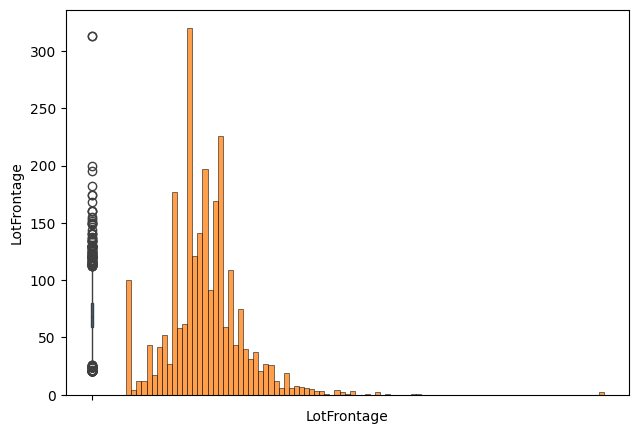

In [44]:
boxHistPlot(df["LotFrontage"])

In [45]:
lotlrontage_mean = df['LotFrontage'].mean()
df_mvi["LotFrontage"].replace(np.nan , lotlrontage_mean,inplace = True)
df_mvi['LotFrontage'].isnull().sum()

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\1321867421.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan , lotlrontage_mean,inplace = True)


0

In [46]:
def oldNewboxHistPlot(df, df_new, feature, figsize = (16,10)):
     plt.figure(figsize=figsize)
     plt.subplot(221)
     sns.boxplot(df[feature] )
     plt.title("Old Data Distribution")
     plt.subplot(222)
     sns.distplot(df[feature])
     plt.title("Old Data Distribution")

     plt. subplot(223)
     sns.boxplot(df_new[feature])
     plt. title("New Data Distribution")
     plt. subplot (224)
     sns.distplot(df_new[feature])
     plt.title("New Data Distribution")


C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\1263759869.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\1263759869.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[feature])


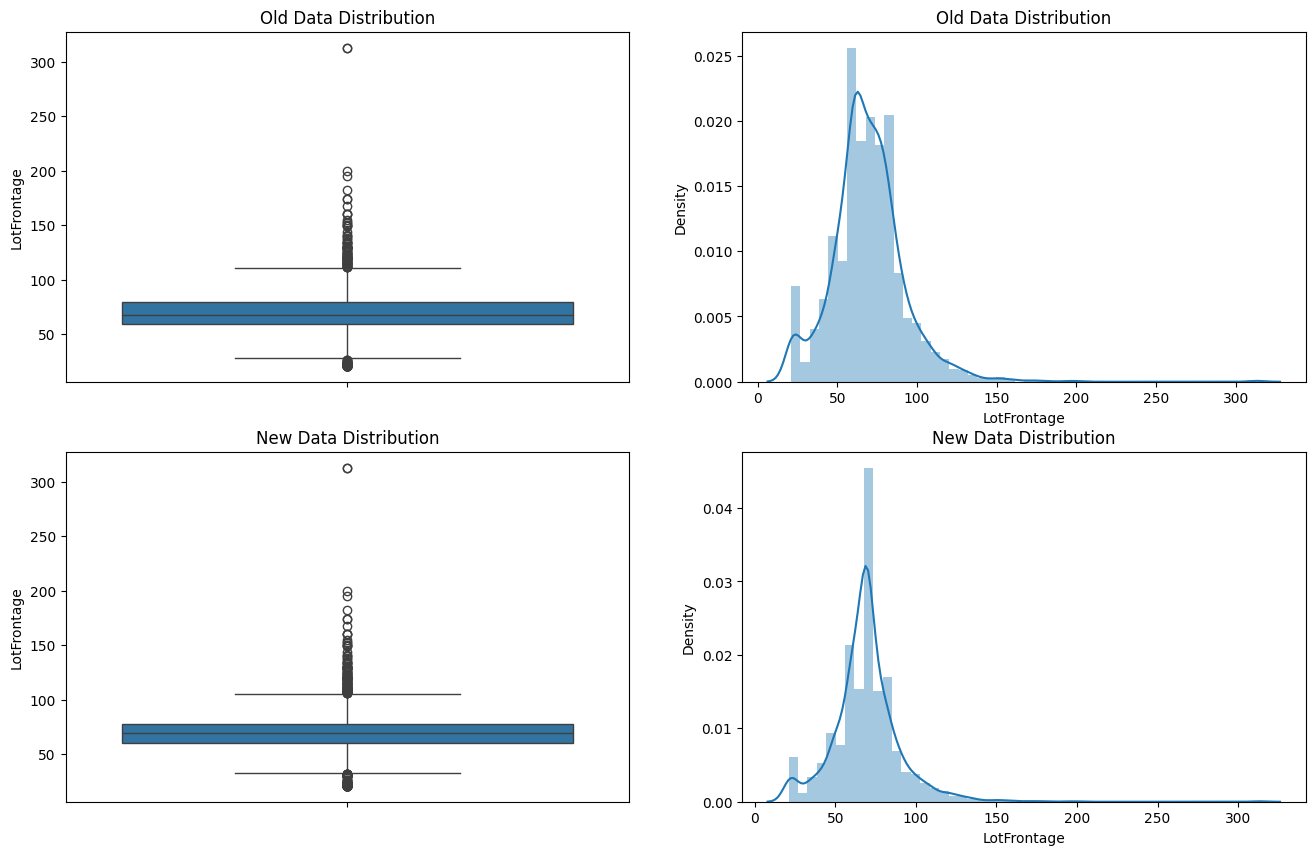

In [47]:
oldNewboxHistPlot(df, df_mvi, "LotFrontage")

In [48]:
##handling utilities

In [49]:
df['Utilities'].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [50]:
utilities_mode = df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace= True)
df_mvi['Utilities'].isnull().sum()

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\2476949282.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace= True)


0

In [51]:
##handling exyerior first 


In [52]:
exterior1st_mode = df["Exterior1st"].mode()[0]
exterior2nd_mode = df["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan, exterior1st_mode, inplace = True)
df_mvi["Exterior2nd"].replace(np.nan, exterior2nd_mode, inplace = True)
print("E1st is null: ", df_mvi["Exterior1st"].isnull().sum())
print("E2nd is null: ", df_mvi["Exterior2nd"].isnull().sum())



E1st is null:  0
E2nd is null:  0


C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\1479490194.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior1st"].replace(np.nan, exterior1st_mode, inplace = True)
C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\1479490194.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [53]:
##handling MasVnrType  and MasVnrarea

<Axes: ylabel='Id'>

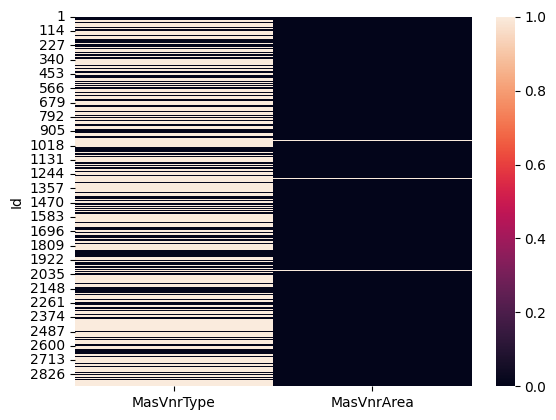

In [54]:
sns.heatmap(df[["MasVnrType", "MasVnrArea"]].isnull())

In [55]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [56]:
masvnrtype_mode = df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan , masvnrtype_mode , inplace = True )
df_mvi["MasVnrType"].isnull().sum()

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\3838165619.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].replace(np.nan , masvnrtype_mode , inplace = True )


0

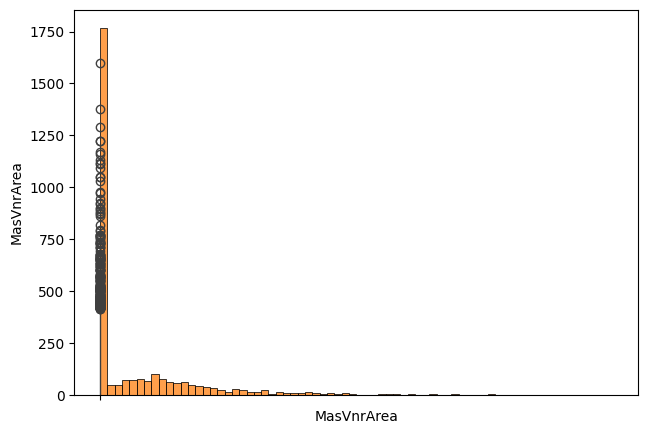

In [57]:
boxHistPlot(df["MasVnrArea"])

In [58]:
masvnrarea_mode = 0
df_mvi["MasVnrType"].replace(np.nan , masvnrarea_mode , inplace = True )
df_mvi["MasVnrType"].isnull().sum()

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\138692240.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].replace(np.nan , masvnrarea_mode , inplace = True )


0

In [59]:
cat_bsmt_feat = [
"BsmtQual"  ,    
"BsmtCond"   , 
"BsmtExposure" ,
"BsmtFinType1" ,
"BsmtFinType2" , 
]

num_bsmt_feat = [
"BsmtFinSF1"  ,
"BsmtFinSF2" ,   
"BsmtUnfSF"  , 
"TotalBsmtSF", 
"BsmtFullBath" ,
"BsmtHalfBath"]



<Axes: ylabel='Id'>

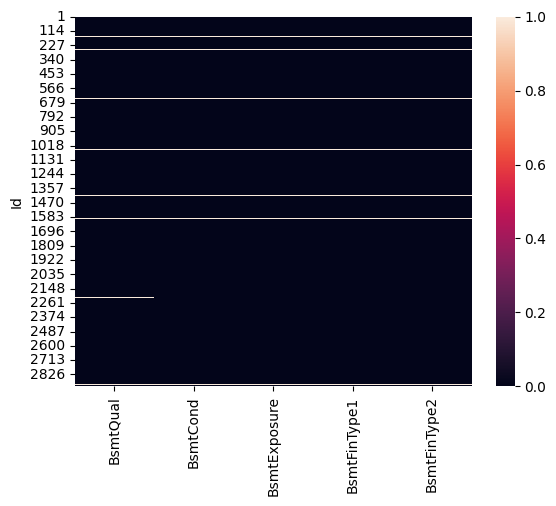

In [60]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [61]:
for feat in cat_bsmt_feat:
    print(f"Value count of {feat}: {df[feat].value_counts()}")

Value count of BsmtQual: BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
Value count of BsmtCond: BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
Value count of BsmtExposure: BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
Value count of BsmtFinType1: BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
Value count of BsmtFinType2: BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [62]:
bsmt_cont = "NA"
for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan,bsmt_cont, inplace = True)

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\3127299250.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,bsmt_cont, inplace = True)


In [63]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: ylabel='Id'>

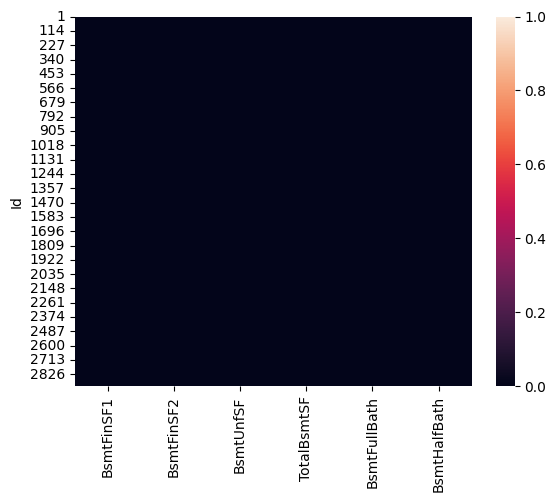

In [64]:
sns.heatmap (df[num_bsmt_feat].isnull())

In [65]:
df_bsmt = df[cat_bsmt_feat + num_bsmt_feat]
df_bsmt [df_bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
260,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
333,Gd,TA,No,GLQ,NaN,1124.0,479.0,1603.0,3206.0,1.0,0.0
343,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
bsmt_num = 0
for feat in num_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_num , inplace = True)
    

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\4026430974.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, bsmt_num , inplace = True)


In [67]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [68]:
 ## handling electrical 

In [69]:
df['Electrical'].value_counts()


Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [70]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [71]:
df_ekk = df[["Electrical" , "KitchenQual" , "KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


In [72]:
electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan, electrical_mode,inplace = True)
df_mvi["Electrical"].isnull().sum()

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\89485740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Electrical"].replace(np.nan, electrical_mode,inplace = True)


0

In [73]:
kitchenQual_mode = df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan,  kitchenQual_mode,inplace = True)
df_mvi["KitchenQual"].isnull().sum()

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\1937554712.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["KitchenQual"].replace(np.nan,  kitchenQual_mode,inplace = True)


0

In [74]:
## handling remaining cat features 

In [75]:
df["Functional"].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [76]:
df["SaleType"].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [77]:
Functional_mode = df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan,  Functional_mode,inplace = True)
df_mvi["Functional"].isnull().sum()

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\1136751337.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Functional"].replace(np.nan,  Functional_mode,inplace = True)


0

In [78]:
SaleType_mode = df["SaleType"].mode()[0]

df_mvi["SaleType"].replace(np.nan, SaleType_mode,inplace = True)
df_mvi["SaleType"].isnull().sum()

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\2196605082.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["SaleType"].replace(np.nan, SaleType_mode,inplace = True)


0

In [79]:
other_cat_feat = ["FireplaceQu",'PoolQC', 'Fence',"MiscFeature"]
for feat in other_cat_feat:
    print(f"Value count of {feat}: {df[feat].value_counts()}")

Value count of FireplaceQu: FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
Value count of PoolQC: PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
Value count of Fence: Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
Value count of MiscFeature: MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


In [80]:
fireplacequ_cont = "NA"
df_mvi["FireplaceQu"].replace(np.nan, fireplacequ_cont,inplace = True)
df_mvi["FireplaceQu"].isnull().sum()

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\1366536253.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["FireplaceQu"].replace(np.nan, fireplacequ_cont,inplace = True)


0

In [81]:
poolqc_cont = "NA"
df_mvi["PoolQC"].replace(np.nan, poolqc_cont,inplace = True)
df_mvi["PoolQC"].isnull().sum()

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\410281787.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["PoolQC"].replace(np.nan, poolqc_cont,inplace = True)


0

In [82]:
fence_cont = "NA"
df_mvi["Fence"].replace(np.nan, fence_cont,inplace = True)
df_mvi["Fence"].isnull().sum()

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\1357383170.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Fence"].replace(np.nan, fence_cont,inplace = True)


0

In [83]:
miscfeature = "NA"
df_mvi["MiscFeature"].replace(np.nan, miscfeature,inplace = True)
df_mvi["MiscFeature"].isnull().sum()

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\420379373.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MiscFeature"].replace(np.nan, miscfeature,inplace = True)


0

In [84]:
## handling garage features 

In [85]:
cat_garage_feat = ["GarageArea", "GarageFinish", "GarageQual", "GarageCond"]
num_garage_feat = ["GarageYrBlt", "GarageCars", "GarageArea"]

df_garafe = df[num_garage_feat + cat_garage_feat]
df_garafe[df_garafe.isnull().any(axis=1)]

,GarageYrBlt,GarageCars,GarageArea,GarageArea,GarageFinish,GarageQual,GarageCond
Id,,,,,,,
40,NaN,0.0,0.0,0.0,NaN,NaN,NaN
49,NaN,0.0,0.0,0.0,NaN,NaN,NaN
79,NaN,0.0,0.0,0.0,NaN,NaN,NaN
89,NaN,0.0,0.0,0.0,NaN,NaN,NaN
90,NaN,0.0,0.0,0.0,NaN,NaN,NaN
100,NaN,0.0,0.0,0.0,NaN,NaN,NaN
109,NaN,0.0,0.0,0.0,NaN,NaN,NaN
126,NaN,0.0,0.0,0.0,NaN,NaN,NaN
128,NaN,0.0,0.0,0.0,NaN,NaN,NaN


In [86]:
garage_cont = "NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan, garage_cont , inplace= True)

df_mvi[cat_garage_feat].isnull().sum()   

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\612552380.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, garage_cont , inplace= True)


GarageArea      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [87]:
garage_num= 0
for feat in num_garage_feat:
    df_mvi[feat].replace(np.nan, garage_num , inplace= True)

df_mvi[num_garage_feat].isnull().sum()   

C:\Users\swapn\AppData\Local\Temp\ipykernel_15996\2683131541.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, garage_num , inplace= True)


GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [88]:
df_mvi.isnull().any(axis=1).sum()

1548

In [89]:
## feature transformation 
## convert numerical feature to categorical feature 

In [90]:
for_num_conv = ["MSSubClass" ,"YearBuilt" , "YearRemodAdd", "GarageYrBlt" , "MoSold" , "YrSold"]
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [91]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [92]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [93]:
calendar.month_abbr[12]

'Dec'

In [94]:
df_mvi['MoSold']= df_mvi["MoSold"].apply(lambda x : calendar.month_abbr[x])
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [95]:
for feat in for_num_conv:
    df_mvi[feat]= df_mvi[feat].astype(str)

In [96]:
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


In [97]:
## convert cateorical features into numerical feature 


In [98]:
ordinal_end_var = [
"ExterQual",
"ExterCond",
"BsmtQual",
"BsmtCond",
"BsmtExposure"
"BsmtFinTypel",
"BsmtFinSF1",
"BsmtFinType2",
"HeatingQC",
"KitchenQual",
"FireplaceQu"
"GarageQual",
"GarageCond",
"PoolQC",
"Functional",
"GarageFinish",
"PavedDrive",
"Utilities"
]

print ("total no of features to convert ordinal numerical format :" , len(ordinal_end_var))

total no of features to convert ordinal numerical format : 16


In [99]:
df_mvi ["ExterQual"].value_counts()

ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64

In [100]:
df_mvi["ExterQual"] = df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po", "Fa", "TA" , "Gd", "Ex"], ordered = True)).cat.codes

In [101]:
df_mvi["ExterQual"].value_counts()

ExterQual
2    1798
3     979
4     107
1      35
Name: count, dtype: int64

In [102]:
##one hot encoding for nominal categorical data

In [103]:
df_encod = df_mvi.copy()

object_features = df_encod.select_dtypes(include = "object").columns.tolist()
print("total object data type features : ", len(object_features))

print(" Features : \n", object_features)

total object data type features :  49
 Features : 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [104]:
df_encod[object_features].head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,2003.0,RFn,548.0,TA,TA,Y,NA,NA,NA,Feb,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976.0,RFn,460.0,TA,TA,Y,NA,NA,NA,May,2007,WD,Normal


In [105]:
df_encod = pd.get_dummies(df_encod, columns= object_features , prefix= object_features, drop_first= True)

In [106]:
## split data for training and testing 

In [107]:
df_encod.shape

(2919, 1162)

In [108]:
len_train = df_train.shape[0]
len_train

1460

In [109]:
X_train = df_encod[:len_train].drop("SalePrice",  axis=1)
y_train = df_encod["SalePrice"][:len_train]
X_test = df_encod[len_train:].drop("SalePrice", axis=1)
print ("Shape of X_train data : ", X_train.shape)
print ("Shape of y_train data : ", y_train.shape) 
print ("Shape of X_test data : ", X_test.shape)

Shape of X_train data :  (1460, 1161)
Shape of y_train data :  (1460,)
Shape of X_test data :  (1459, 1161)


In [110]:
#feature scaling 


In [111]:
sc = StandardScaler()
sc.fit(X_train)
# formula = z = (x-u)/s

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [112]:
X_train[:3,:]

array([[-0.22335706, -0.20714171,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637, -0.07183611, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [113]:
X_test[:3,:]

array([[ 0.45789401,  0.11076257, -0.79515147, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.50331075,  0.37584985, -0.07183611, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.18539358,  0.33205282, -0.79515147, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [114]:
sc.mean_

array([6.99179459e+01, 1.05168281e+04, 6.09931507e+00, ...,
       1.36986301e-02, 8.20547945e-01, 8.56164384e-02])

In [115]:
sc.n_features_in_

1161

In [116]:
sc.n_samples_seen_

array([1460, 1460, 1460, ..., 1460, 1460, 1460], dtype=int64)

In [117]:
sc.scale_

array([2.20183141e+01, 9.97784611e+03, 1.38252284e+00, ...,
       1.16236731e-01, 3.83730393e-01, 2.79796826e-01])

In [118]:
sc.var_

array([4.84806156e+02, 9.95574129e+07, 1.91136939e+00, ...,
       1.35109777e-02, 1.47249015e-01, 7.82862638e-02])

In [119]:
sc.with_mean

True

In [120]:
sc.with_std

True

In [121]:
#train ml model 

In [122]:
!pip3 install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 1.3 MB/s eta 0:01:38
   ---------------------------------------- 0.0/124.9 MB 1.3 MB/s eta 0:01:38
   ---------------------------------------- 0.1/124.9 MB 491.5 kB/s eta 0:04:14
   ---------------------------------------- 0.1/124.9 MB 491.5 kB/s eta 0:04:14
   ---------------------------------------- 0.1/124.9 MB 491.5 kB/s eta 0:04:14
   ---------------------------------------- 0.1/124.9 MB 566.5 kB/s eta 0:03:41
   ---------------------------------------- 0.1/124.9 MB 566.5 kB/s eta 0:03:41
   ---------------------------------------- 0.2/124.9 MB 498.0 kB/s eta 0:04:11
   ---------------------------------------- 0.2/124.9 MB 498.0 kB/s eta 0:04:11
   ---------------------------------------- 0.2/124.9 MB 452.9 kB/s eta 0:04:36
   ---------------------------------------- 0.2/124.9 MB 491.0

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 479, in read
    s = self.fp.read

   -------- ------------------------------ 28.7/124.9 MB 209.6 kB/s eta 0:07:39
   -------- ------------------------------ 28.8/124.9 MB 209.6 kB/s eta 0:07:39
   -------- ------------------------------ 28.8/124.9 MB 209.6 kB/s eta 0:07:39
   -------- ------------------------------ 28.8/124.9 MB 209.6 kB/s eta 0:07:39
   -------- ------------------------------ 28.8/124.9 MB 209.9 kB/s eta 0:07:38
   -------- ------------------------------ 28.8/124.9 MB 209.9 kB/s eta 0:07:38
   --------- ----------------------------- 28.8/124.9 MB 209.6 kB/s eta 0:07:39
   --------- ----------------------------- 28.8/124.9 MB 209.6 kB/s eta 0:07:39
   --------- ----------------------------- 28.8/124.9 MB 209.9 kB/s eta 0:07:38
   --------- ----------------------------- 28.9/124.9 MB 209.8 kB/s eta 0:07:38
   --------- ----------------------------- 28.9/124.9 MB 209.8 kB/s eta 0:07:38
   --------- ----------------------------- 28.9/124.9 MB 209.9 kB/s eta 0:07:38
   --------- ---------------------------

In [123]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.neural_network import MLPRegressor



In [124]:
svr = SVR()
lr = LinearRegression ()
sgdr = SGDRegressor ()
knr = KNeighborsRegressor ()
gpr = GaussianProcessRegressor ()
dtr = DecisionTreeRegressor ()
gbr = GradientBoostingRegressor ()
rfr = RandomForestRegressor

mlpr = MLPRegressor()
ir = IsotonicRegression()

In [125]:
models = { "a": ["LinearRegression", lr],
           "b" : ["SVR", svr],
           "c" : ["SGDRegressor", sgdr],
           "d" : ["KNeighborsRegressor"
, knr],
           "e" : ["GaussianProcessRegressor", gpr],
           "f": ["DecisionTreeRegressor", dtr],
           "g" : ["GradientBoostingRegressor", gbr],
           "h" : ["RandomForestRegressor", rfr],
           
           "i" : ["MLPRegressor", mlpr],
           "j" : ["IsotonicRegression", ir] }

In [126]:
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train= X_train, y_train=y_train):
    cv = KFold(n_splits = 7, shuffle=True, random_state = 45)
    r2 = make_scorer (r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean ()]
    return score

In [128]:
models_score = [ ]
for model in models:
    print("training model : ", models [model][0])
    score = test_model(models[model][1], X_train, y_train)
    print("score of model : ", score)
    models_score.append([models[model][0],score[0]])

training model :  LinearRegression


ValueError: 
All the 7 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_base.py", line 578, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1049, in check_array
    _assert_all_finite(
  File "c:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 126, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "c:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 175, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [129]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Data Collection (Hypothetical Dataset)
data = {
    'square_footage': [1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400],
    'bedrooms': [3, 3, 3, 4, 4, 4, 5, 5, 5, 5],
    'bathrooms': [2, 2, 2, 3, 3, 3, 4, 4, 4, 4],
    'price': [300000, 320000, 340000, 360000, 380000, 400000, 420000, 440000, 460000, 480000]
}

df = pd.DataFrame(data)

# Step 2: Data Preprocessing
# In this case, our dataset is already clean and does not require any preprocessing.

# Step 3: Model Implementation
X = df[['square_footage', 'bedrooms', 'bathrooms']]
y = df['price']

# Step 4: Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Step 6: Prediction
# Predicting the price of a house with 2500 square footage, 5 bedrooms, and 4 bathrooms
new_house = np.array([[2500, 5, 4]])
predicted_price = model.predict(new_house)
print(f"Predicted Price: {predicted_price[0]}")


Mean Squared Error: 0.0
R² Score: 1.0
Predicted Price: 500000.0


c:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
